# Gravity Simulation:

Importing the essentials:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import cv2
import os

c:\users\astro\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\astro\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\astro\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Function to save images and create a video out of them.

In [2]:
# Use this function after the images are saved to a particular folder.

# Always use numbers to name the image files, no alphabets should be there in the names.
def save_to_video(video_name:'str',image_folder='folder_path_where_your_images_saved', fps=30):
    print('Video starting to process')
    # gather the names of the images in the folder:
    images = [img for img in os.listdir(image_folder) if img.endswith('.png')]
    
    # sort the images number wise.
    images = sorted(images, key=lambda x: int(os.path.splitext(x)[0]))
    #if you have used alphabets in the order 'image_01.png'
    # Use:
    #images = sorted(images, key=lambda x: int(x.splitext(x.split('_')[-1])[0])) check the below rough work.
    
    # Convert any image into array and check the dimensions of data type:
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    print(frame.shape)
    height, width, layers = frame.shape #(height, width, color channels)
    
    # Video codec, etc settings ('DIVX best for windows' source:https://docs.opencv.org/master/dd/d43/tutorial_py_video_display.html)
    fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    '''**Note**: This fourcc will work for both Mac and Windows users. '''
    
    # Create the video object from cv2 with appropriate arguments:
    video = cv2.VideoWriter(video_name, fourcc, fps, (width,height))
    print('Video is processing...')
    # Add image from the images
    for image in images:
        # Join the name of the image to full path directory and convert the image into array and add it to the video file.
        video.write(cv2.imread(os.path.join(image_folder, image)))
    
    # Destroying cv2 windows (safety protocol)
    cv2.destroyAllWindows()
    print(f"Video Processes\nSave in/as '{video_name}'.")
    #Upload the video at desired path:
    video.release()

# Main function:

In [6]:
#Main function :
# X0 -> X1
# @vectorize(['float32(float32, float32, float32, float32, float32, float32)'], target='cuda')
def step(mass:'arr', x0:'arr',y0:'arr',vx0:'arr',vy0: 'arr',dt=0.1, G = 1):
    
    x1 = x0 + vx0*dt
    y1 = y0 +vy0*dt
    
    vx1 = []
    vy1 = []
    #Loop over planets to find the distance:
    for i in range(len(x1)):
        x1self = x1[i]
        y1self = y1[i]
        ax = 0
        ay = 0
        for j in range(len(x0)):
            if i == j:
                continue
            x_dist = x1[j] - x1self
            y_dist = y1[j] - y1self
            Rsq = x_dist**2 + y_dist**2

            # Contribution from the jth mass:
            a = G*mass[j]/Rsq
            ax += a * x_dist/np.sqrt(Rsq)
            ay += a * y_dist/np.sqrt(Rsq)
        vx1.append(vx0[i] + ax*dt)
        vy1.append(vy0[i] + ay*dt)
        
    return x1,y1,np.array(vx1),np.array(vy1)

#### Description( of *above function*):

The `step()` function will take the "*initial positions/previous positions*" of the bodies as inputs and give their respective "*present positions*". This is done in the following way:
1) The function `step()` takes:
- `mass` (*masses of all the bodies in one array*)
- `x0` (*x position of all the bodies in one array*)
- `y0` (*y position of all the bodies in one array*)
- `vx0` (*x component of velocties for all the bodies, also in an array*)
- `vy0` (*y component of velocties for all the bodies, also in an array*)
- `dt` (*component of time*)
- `G` (*Gravitational Constant (for visualization purposes <u>G=1</u>*)

2) Find the latest x and y positions, denoted as x1, y1:
- This is done by using the kinematic equation: $x = x_0 + v_{x_0}t$ <br> $x_0 = $ initial x_position (= `x0`). <br>$v_{x_0}$ = initial x component of velocity (= `vx0`) <br> Similarly for *y1*. <br> We proceed to make **two empty lists** for "Velocities" that we shall update within the loop.

3) We make a loop to calculate the acceleration and update the velocities. This process loops over the number of bodies and finding their acceleration using <br>the Newton's Gravitation formula: $ F = ma = \frac{G*M*m}{R^2}$. <br> After this, we find the component of acceleration $a_x, a_y$ .<br> Then we append (*add*) $v_{x_1} = v_{x_0} + a_x*dt$ to the `vx1 =[]` list (similarly for vy1).

### scaling points:
The next function is to scale the points, according to their mass.

In [3]:
# Function to scale masses for their sizes
def scale_the_array(arr, min_=7, max_=300):
    l = []
    for element in arr:
        if arr.max() != arr.min():
            scaled_element = ((element - arr.min())/(arr.max()-arr.min()))*(max_-min_) + min_
            l.append(scaled_element)
        else:
            # Default size
            l = [20, 20]
            
    return np.array(l)

## First simulation:
1 star and two planets:

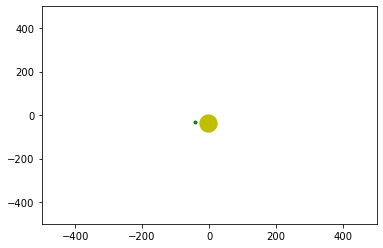

frame: 299/300


In [4]:
# masses
masses = np.array([100000, 950, 500])

# Initial x positions
x0 = np.array([0,72, 200])
# Initial y positions
y0 = np.array([0, 0, 0])
# Initial  
vx0 = np.array([0, 0, -5])
vy0 = np.array([0, -30, 12])

# Calling the function to scale masses to determine its size.
scaled_masses = scale_the_array(masses) 

fig = plt.figure()
camera = Camera(fig)
for time in range(300):
    x1,y1,vx1,vy1 = step(masses, x0, y0, vx0, vy0, dt=0.5)
    plt.scatter(x1[0],y1[0],c='y', s= scaled_masses[0])
    plt.scatter(x1[1],y1[1], c='g', s= scaled_masses[1])
    plt.scatter(x1[2], y1[2], c='c', s = scaled_masses[2])
    plt.xlim(-500, 500)
    plt.ylim(-500, 500)
    # take a picture
    camera.snap()
    #plt.savefig(f"../IAPT Course Work/Animations/{time+1}.png")
    plt.show()
    print(f"frame: {time}/300")    
    clear_output(wait=True)
    x0 = x1
    y0 = y1
    vx0 = vx1
    vy0 = vy1


In [18]:
save_to_video(video_name="2 planets and one star.mp4")

Video starting to process
(288, 432, 3)
Video is processing...
Video Processes
Save in/as '2 planets and one star.mp4'.




[click here](https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range/281164) for reading about scaling a number between a range.

In this code &#x2935;, there is a loop to scatter plot all bodies.

## Simulation 2:
1 star, 3 planets:

<u>Note</u>: The lag in the loop will appear more with more bodies, I tried to make a video function to smoothen the animation.

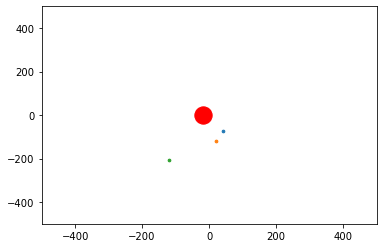

frame: 99/100


In [12]:
max_time = 100
masses = np.array([100000, 150, 300, 200])
x0 = np.array([-20, 72, 200, 312])
y0 = np.array([0, 0, 0, 0])
vx0 = np.array([0, 0, -5, -1])
vy0 = np.array([0, -30, 12, 15])
 
scaled_masses = scale_the_array(masses)

for time in range(max_time):
    x1,y1,vx1,vy1 = step(masses, x0, y0, vx0, vy0, dt=0.5)
    for i in range(len(masses)):
        plt.scatter(x1[i],y1[i], s = scaled_masses[i], c = 'r' if scaled_masses[i]==scaled_masses.max() else None)
    plt.xlim(-500, 500)
    plt.ylim(-500, 500)
    #plt.savefig(f"../images for_animations/{time}.png")
    plt.show()
    print(f"frame: {time}/{max_time}")
    clear_output(wait=True)
    x0 = x1
    y0 = y1
    vx0 = vx1
    vy0 = vy1

In [14]:
save_to_video('1_star_3_planets.mp4')

Video starting to process
(288, 432, 3)
Video is processing...
Video Processes
Save in/as '1_star_3_planets.mp4'.


# Function: randomly generate stars:

This function takes the number of celestial bodies as input 

In [13]:
def random_stars(num_bodies = 40, max_mass = 100000, v_max= 100, max_time = 300):
    #frame:
    y_limit = (-500,500)
    x_limit = (-500, 500)
    
    masses = np.random.randint(30, max_mass,num_bodies)
    x0 = np.random.randint(x_limit[0], x_limit[1], num_bodies)
    y0 = np.random.randint(y_limit[0], y_limit[1], num_bodies)
    
    vx0 = np.random.randint(-v_max,v_max,num_bodies)
    vy0 = np.random.randint(-v_max, v_max, num_bodies)
    print(vx0)
    
    for time in range(max_time):
        x1,y1,vx1,vy1 = step(masses, x0, y0, vx0, vy0, dt=0.5)
        for i in range(num_bodies):
            plt.scatter(x1[i],y1[i])
        plt.xlim(x_limit[0], x_limit[1])
        plt.ylim(y_limit[0], y_limit[1])
        plt.show()
        clear_output(wait=True)
        x0 = x1
        y0 = y1
        vx0 = vx1
        vy0 = vy1

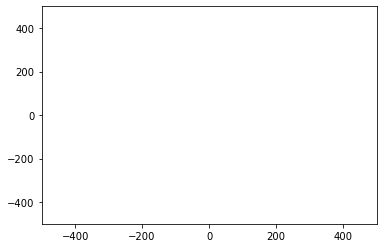

In [14]:
random_stars(num_bodies=30)

# Realistic measured simulation:

First we will write down all the constants and variables:

In [7]:

# Gravitational Constant
G = 6.67e-11

#Bodies:
celestial_bodies = ['Sun', 'mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']

# Masses: (in kg)
masssun = 1.989e30
massmercury = 3.285e23
massvenus = 4.867e24
massearth = 5.97e24
massmars = 6.39e23
massjupiter = 1.898e27
masssaturn = 5.683e26
massuranus = 8.681e25
massneptune = 1.024e26

# distance in Astronomical unit 
au = 1.496e+11 # meters
mercury_dist = 0.39 * au
venus_dist = 0.723 * au
earth_dist = au
mars_dist = 1.524 * au
jupiter_dist = 5.203 * au
saturn_dist = 9.539 * au
uranus_dist = 19.18 * au
neptune_dist = 30.06 * au

#Velocities: (m/s)
v_earth = 30*1000 # (30km/sec)
v_mercury = 1.607 * v_earth
v_venus = 1.174 * v_earth
v_mars = 0.802 * v_earth
v_jupiter = 0.434 * v_earth
v_saturn = 0.323 * v_earth
v_uranus = 0.228 * v_earth
v_neptune = 0.182 * v_earth

Creating arrays for the constants.

In [8]:
# info Arrays
masses = np.array([masssun, massmercury, massvenus, massearth, massmars, massjupiter, masssaturn, massuranus, massneptune])
x0 = np.array([0, -mercury_dist, venus_dist, earth_dist, mars_dist, jupiter_dist, saturn_dist, uranus_dist, neptune_dist])
y0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
vx0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
vy0 = np.array([0, -v_mercury, v_venus, v_earth, v_mars, v_jupiter, v_saturn, v_uranus, v_neptune])

<u>**Note**</u>:
- `x0` represents the initial *x position* for all the celestial bodies.
- `y0` represents the initial *y position* for all the celestial bodies.
- `vx0` represents the initial *x velocity* for all the celestial bodies.
- `vy0` represents the initial *y velocity* for all the celestial bodies.

**Scaling** the *mass array*: this step is for adjusting the size of the points (celestial bodies) in the graph.

We use the function we defined earlier.

In [9]:
scaled_masses = scale_the_array(masses)

The main loop to scatter plot the bodies in a time loop.

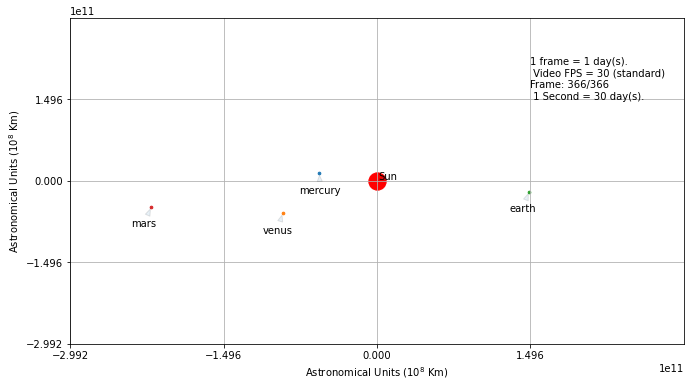

frame: 365/366
 Each frame is 1 days.


In [10]:
# loop constants
fps = 30 #for video (default is 30)
max_time = 366
days_per_frame = 1

#graph limit:
limit = 2*au

# Time loop
for time in range(max_time):
    fig, ax = plt.subplots(figsize=(11,6))
    x1,y1,vx1,vy1 = step(masses, x0, y0, vx0, vy0, dt=days_per_frame*24*60*60,G=G)
    
    # Plot each body
    for i in range(len(masses)):
        ax.scatter(x1[i],y1[i], s = scaled_masses[i], c = 'r' if scaled_masses[i]==scaled_masses.max() else None)
    for i in range(len(x1)):
        ax.annotate(celestial_bodies[i], (x1[i], y1[i]),  annotation_clip=True, clip_on=True, xytext=(1 if x1[i]==x1[0] else -20 , 1 if y1[i]==y1[0] else -20), textcoords = 'offset points', arrowprops = dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))
        
    #graph limit box:
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)
    
    #Text:
    plt.text(x=limit-au, y=limit-au,s=f"1 frame = {days_per_frame} day(s).\n Video FPS = 30 (standard)\nFrame: {time+1}/{max_time}\n 1 Second = {days_per_frame*fps} day(s).")
    
    # Setting appropriate ticks (numbers for AU)
    plt.xticks([x*au for x in range(-int(limit/au),int(limit/au))])
    plt.xlabel(r'Astronomical Units ($10^{8}$ Km)')
    plt.yticks([y*au for y in range(-int(limit/au),int(limit/au))])
    plt.ylabel(r'Astronomical Units ($10^{8}$ Km)')
    
    #grid
    plt.grid(True)
    
    # Save file (for video purposes)
    #plt.savefig(f"../IAPT Course Work/Animations/{time}.png")
    
    plt.show()
    print(f"frame: {time}/{max_time}\n Each frame is {days_per_frame} days.")
    clear_output(wait=True)
    x0 = x1
    y0 = y1
    vx0 = vx1
    vy0 = vy1